# 1. using Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Function to generate synthetic data with 2 clusters
def generate_synthetic_data():
    np.random.seed(0)
    #Cluster 1
    cluster_1 = np.random.randn(100,2) + np.array([5,5])
    #Cluster 2
    cluster_2 = np.random.randn(100,2) + np.array([-5,-5])
    #Combine the clusters
    data = np.vstack([cluster_1, cluster_2])
    return data

In [4]:
#Funcion to initialize centroids
def initialize_centroid(data, k):
    indices = np.random.choice(len(data), k, replace=False)
    centroid = data[indices]
    return centroid

In [6]:
#Function to assign each data points to the nearest centroid
def assign_to_cluster(data, centroid):
    distances = np.linalg.norm(data[:, None, :] - centroid, axis=2)
    labels = np.argmin(distances, axis=1)
    return labels

In [7]:
#Function to update centroid based on the mean of ponts in each cluster
def update_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

In [8]:
def has_converged(old_centroid, centroid, tol=1e-4):
    return np.linalg.norm(old_centroid - centroid) < tol

In [13]:
def k_mean_clustering(data, k):
    #Initialize centroids
    centroids = initialize_centroid(data, k)
    
    while True:
        #Assign each data points to the nearest centroid
        labels = assign_to_cluster(data, centroids)
        
        #Store old centroid for convergence check
        old_centroid = centroids.copy()
        
        #Update the centroid based on mean of points in each cluster
        centroids = update_centroids(data, labels, k)
        
        #Check for convergence
        if has_converged(old_centroid, centroids):
            break
    return labels, centroids

In [18]:
data = generate_synthetic_data()

In [19]:
data

array([[ 6.76405235,  5.40015721],
       [ 5.97873798,  7.2408932 ],
       [ 6.86755799,  4.02272212],
       [ 5.95008842,  4.84864279],
       [ 4.89678115,  5.4105985 ],
       [ 5.14404357,  6.45427351],
       [ 5.76103773,  5.12167502],
       [ 5.44386323,  5.33367433],
       [ 6.49407907,  4.79484174],
       [ 5.3130677 ,  4.14590426],
       [ 2.44701018,  5.6536186 ],
       [ 5.8644362 ,  4.25783498],
       [ 7.26975462,  3.54563433],
       [ 5.04575852,  4.81281615],
       [ 6.53277921,  6.46935877],
       [ 5.15494743,  5.37816252],
       [ 4.11221425,  3.01920353],
       [ 4.65208785,  5.15634897],
       [ 6.23029068,  6.20237985],
       [ 4.61267318,  4.69769725],
       [ 3.95144703,  3.57998206],
       [ 3.29372981,  6.9507754 ],
       [ 4.49034782,  4.5619257 ],
       [ 3.74720464,  5.77749036],
       [ 3.38610215,  4.78725972],
       [ 4.10453344,  5.3869025 ],
       [ 4.48919486,  3.81936782],
       [ 4.97181777,  5.42833187],
       [ 5.06651722,

In [20]:
k = 2
labels, centroid = k_mean_clustering(data, k)

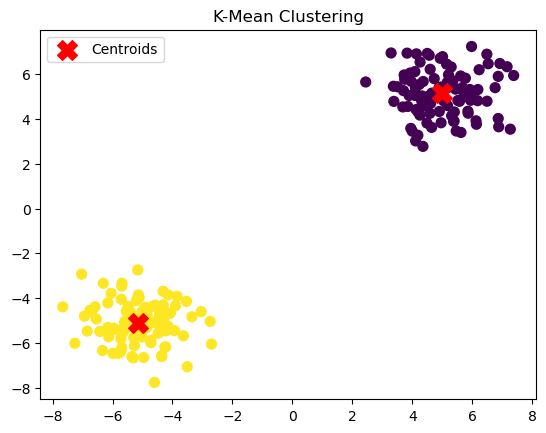

In [21]:
#Plot the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroid[:, 0], centroid[:, 1], marker = "X", c='red', label='Centroids', s=200)
plt.title('K-Mean Clustering')
plt.legend()
plt.show()

# 2. using Sklearn

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
#Function to generate synthetic data with 2 clusters
def generate_synthetic_data():
    np.random.seed(0)
    #Cluster 1
    cluster_1 = np.random.randn(100,2) + np.array([5,5])
    #Cluster 2
    cluster_2 = np.random.randn(100,2) + np.array([-5,-5])
    #Combine the clusters
    data = np.vstack([cluster_1, cluster_2])
    return data

In [26]:
data = generate_synthetic_data()

In [27]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(data)
centroid = kmeans.cluster_centers_

C:\Users\ramsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ramsu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


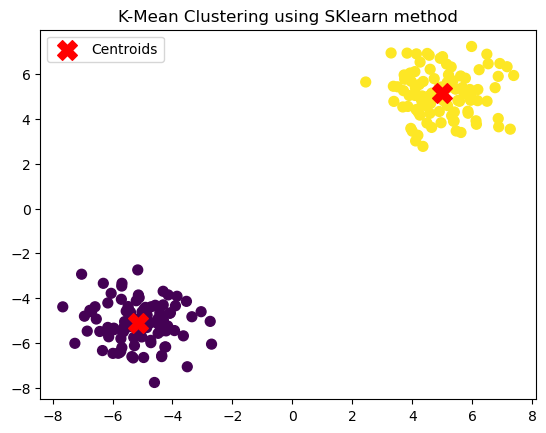

In [28]:
#Plot the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroid[:, 0], centroid[:, 1], marker = "X", c='red', label='Centroids', s=200)
plt.title('K-Mean Clustering using SKlearn method')
plt.legend()
plt.show()